# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

In [3]:
cities

['longyearbyen',
 'atuona',
 'rikitea',
 'villa carlos paz',
 'butaritari',
 'punta arenas',
 'nouadhibou',
 'qaanaaq',
 'bambous virieux',
 'saskylakh',
 'sikasso',
 'san patricio',
 'abu dhabi',
 'sola',
 'vallenar',
 'ponta do sol',
 'albany',
 'mesquite',
 'mataura',
 'jamestown',
 'karasburg',
 'hilo',
 'baracoa',
 'bathsheba',
 'yining',
 'vaini',
 'magadan',
 'allanmyo',
 'ushuaia',
 'port elizabeth',
 'khatanga',
 'ures',
 'arraial do cabo',
 'busselton',
 'margate',
 'mrirt',
 'creel',
 'chapais',
 'korem',
 'cherskiy',
 'nikolskoye',
 'hobart',
 'santa maria',
 'bangassou',
 'airai',
 'cape town',
 'geraldton',
 'rio gallegos',
 'aripuana',
 'lebu',
 'dalvik',
 'kavaratti',
 'gizo',
 'coquimbo',
 'jiuquan',
 'marechal candido rondon',
 'upernavik',
 'karratha',
 'komsomolskiy',
 'necochea',
 'tura',
 'puerto ayora',
 'svit',
 'bargal',
 'east london',
 'sirnak',
 'clyde river',
 'souillac',
 'constitucion',
 'port hardy',
 'kanungu',
 'paamiut',
 'havre',
 'doha',
 'cabo san 

In [4]:
url = 'https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
base_url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}'

response = requests.get(base_url+"&q="+"New York")

response.status_code

200

In [6]:
city_data = []
record = 0
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for city in cities:
    city_url = base_url +"&q="+ city
    try:
        response = requests.get(city_url).json()
        temperature= response['main']['temp_max']
        date = response['dt']
        cloudiness = response['clouds']['all']
        humidity = response['main']['humidity']
        lat = response['coord']['lat']
        lon = response['coord']['lon']
        wind_speed = response["wind"]["speed"]
        city_name = city
        city_country = response['sys']['country']
        
       
        print(f"Processing Record {record} | {record}")
        print(f"{url}&q={city}")
        
        city_data.append({"city name":city_name,
                          "lat":lat, "lon":lon,
                          "temperature":temperature,
                          "humidity":humidity, 
                          "cloudiness":cloudiness,
                          "wind_speed":wind_speed,
                          "city_country":city_country, 
                          "date":date})
        record = record +1 
        
        #time.sleep(.5)
         
    
    except:
        print(city + " not found, moving on...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 0 | 0
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=longyearbyen
Processing Record 1 | 1
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=atuona
Processing Record 2 | 2
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=rikitea
Processing Record 3 | 3
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=villa carlos paz
Processing Record 4 | 4
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=butaritari
Processing Record 5 | 5
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=punta arenas
Processing Record 6 | 6
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee

Processing Record 59 | 59
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=puerto ayora
Processing Record 60 | 60
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=svit
bargal not found, moving on...
Processing Record 61 | 61
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=east london
Processing Record 62 | 62
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=sirnak
Processing Record 63 | 63
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=clyde river
Processing Record 64 | 64
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=souillac
Processing Record 65 | 65
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=constitucion
Pr

Processing Record 117 | 117
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=bredasdorp
Processing Record 118 | 118
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=avarua
Processing Record 119 | 119
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=mogzon
Processing Record 120 | 120
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=axim
Processing Record 121 | 121
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=beringovskiy
Processing Record 122 | 122
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=lagoa
Processing Record 123 | 123
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=amarante do maranhao
Processing Record 12

Processing Record 176 | 176
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=provideniya
Processing Record 177 | 177
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=kaeo
Processing Record 178 | 178
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=henties bay
Processing Record 179 | 179
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=kahului
Processing Record 180 | 180
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=tasiilaq
Processing Record 181 | 181
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=vestmanna
Processing Record 182 | 182
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=kodiak
barentsburg not found, movi

Processing Record 233 | 233
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=boralday
Processing Record 234 | 234
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=shirokiy
Processing Record 235 | 235
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=pula
Processing Record 236 | 236
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=camacupa
Processing Record 237 | 237
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=ternuvate
Processing Record 238 | 238
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=houma
Processing Record 239 | 239
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=nantucket
Processing Record 240 | 240
http

Processing Record 292 | 292
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=belaya gora
Processing Record 293 | 293
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=starogard gdanski
Processing Record 294 | 294
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=pimentel
Processing Record 295 | 295
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=samarai
Processing Record 296 | 296
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=chivacoa
Processing Record 297 | 297
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=la rioja
vaitupu not found, moving on...
Processing Record 298 | 298
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee3

Processing Record 350 | 350
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=panaba
Processing Record 351 | 351
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=emba
Processing Record 352 | 352
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=portland
Processing Record 353 | 353
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=fujisawa
marcona not found, moving on...
Processing Record 354 | 354
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=carutapera
Processing Record 355 | 355
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=ortigueira
Processing Record 356 | 356
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=sitka


Processing Record 408 | 408
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=westport
Processing Record 409 | 409
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=mahebourg
Processing Record 410 | 410
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=salmas
Processing Record 411 | 411
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=nove mesto pod smrkem
Processing Record 412 | 412
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=chicama
Processing Record 413 | 413
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=sangar
Processing Record 414 | 414
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=chifeng
Processing Record 4

Processing Record 467 | 467
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=manokwari
Processing Record 468 | 468
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=brigantine
Processing Record 469 | 469
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=dabhol
Processing Record 470 | 470
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=flin flon
Processing Record 471 | 471
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=kamyshlov
temaraia not found, moving on...
Processing Record 472 | 472
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=botwood
Processing Record 473 | 473
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=r

Processing Record 525 | 525
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=tashara
Processing Record 526 | 526
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=nuuk
Processing Record 527 | 527
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=boddam
Processing Record 528 | 528
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=laela
Processing Record 529 | 529
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=north bend
Processing Record 530 | 530
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=klyuchi
Processing Record 531 | 531
https://api.openweathermap.org/data/2.5/weather?q=New%20York&appid=3ebdac58f1b8e1a2e4e0aa350ee39468&q=evensk
Processing Record 532 | 532
https://ap

In [7]:
df = pd.DataFrame(city_data)
df.head()

,city name,lat,lon,temperature,humidity,cloudiness,wind_speed,city_country,date
0,longyearbyen,78.2186,15.6401,273.06,74,75,10.29,SJ,1638904889
1,atuona,-9.8000,-139.0333,298.72,77,11,8.68,PF,1638905038
2,rikitea,-23.1203,-134.9692,297.26,71,100,10.19,PF,1638904991
3,villa carlos paz,-31.4241,-64.4978,302.75,41,98,3.58,AR,1638904977
4,butaritari,3.0707,172.7902,301.22,77,83,6.74,KI,1638905039


In [8]:
city_df = pd.DataFrame(city_data)
city_df
# = pd.DataFrame(city_data)

# city_df.head()

,city name,lat,lon,temperature,humidity,cloudiness,wind_speed,city_country,date
0,longyearbyen,78.2186,15.6401,273.06,74,75,10.29,SJ,1638904889
1,atuona,-9.8000,-139.0333,298.72,77,11,8.68,PF,1638905038
2,rikitea,-23.1203,-134.9692,297.26,71,100,10.19,PF,1638904991
3,villa carlos paz,-31.4241,-64.4978,302.75,41,98,3.58,AR,1638904977
4,butaritari,3.0707,172.7902,301.22,77,83,6.74,KI,1638905039
...,...,...,...,...,...,...,...,...,...
566,nizwa,22.9333,57.5333,292.36,75,0,2.13,OM,1638905208
567,villafranca de los barros,38.5614,-6.3381,285.55,91,54,8.10,ES,1638905208
568,moen,69.1304,18.6123,265.19,76,0,0.00,NO,1638905209
569,kasongo-lunda,-6.4667,16.8167,294.90,99,100,0.65,CD,1638905209


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
city_df.head()

,city name,lat,lon,temperature,humidity,cloudiness,wind_speed,city_country,date
0,longyearbyen,78.2186,15.6401,273.06,74,75,10.29,SJ,1638904889
1,atuona,-9.8000,-139.0333,298.72,77,11,8.68,PF,1638905038
2,rikitea,-23.1203,-134.9692,297.26,71,100,10.19,PF,1638904991
3,villa carlos paz,-31.4241,-64.4978,302.75,41,98,3.58,AR,1638904977
4,butaritari,3.0707,172.7902,301.22,77,83,6.74,KI,1638905039


In [10]:
city_df.describe()

,lat,lon,temperature,humidity,cloudiness,wind_speed,date
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,5.710000e+02
mean,19.955979,16.286523,284.721086,71.169877,60.133100,3.848231,1.638905e+09
std,33.341574,90.390754,16.503741,21.753666,40.166886,2.951067,9.464019e+01
min,-54.800000,-175.200000,230.690000,9.000000,0.000000,0.000000,1.638905e+09
25%,-7.552200,-61.342150,273.595000,59.000000,14.500000,1.770000,1.638905e+09
50%,22.933300,18.526400,289.270000,76.000000,75.000000,3.090000,1.638905e+09
75%,48.604850,94.400000,298.370000,87.000000,100.000000,5.120000,1.638905e+09
max,78.218600,179.316700,311.520000,100.000000,100.000000,19.450000,1.638905e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

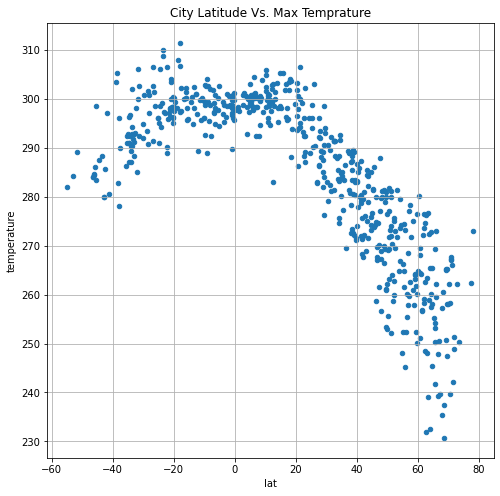

In [11]:
city_df.plot(kind="scatter", x="lat", y="temperature", grid=True, figsize=(8,8),
              title="City Latitude Vs. Max Temprature")
plt.show()

## Latitude vs. Humidity Plot

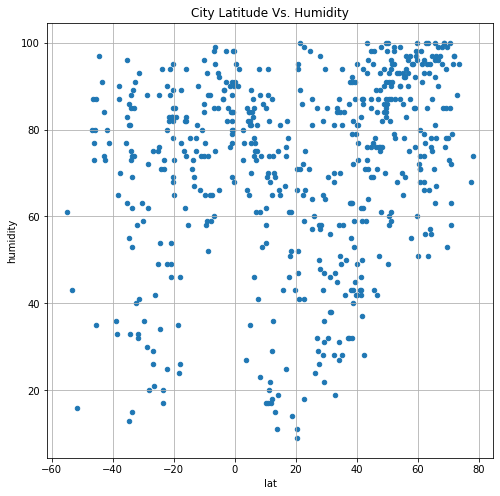

In [12]:
city_df.plot(kind="scatter", x="lat", y="humidity", grid=True, figsize=(8,8),
              title="City Latitude Vs. Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

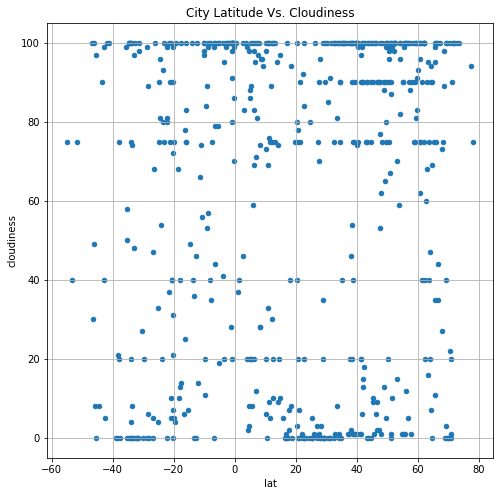

In [13]:
city_df.plot(kind="scatter", x="lat", y="cloudiness", grid=True, figsize=(8,8),
              title="City Latitude Vs. Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

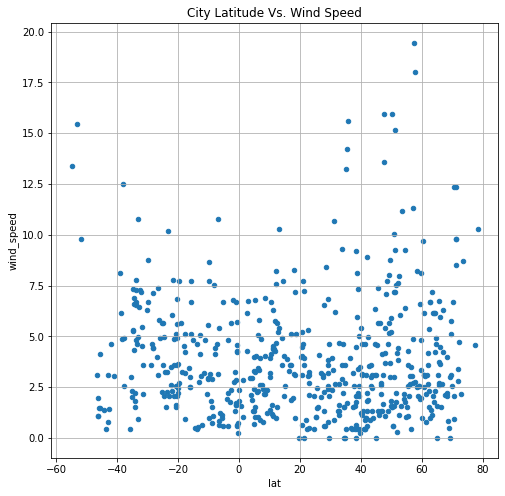

In [14]:
city_df.plot(kind="scatter", x="lat", y="wind_speed", grid=True, figsize=(8,8),
              title="City Latitude Vs. Wind Speed")
plt.show()

## Linear Regression

In [15]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hemisphere = city_df.loc[city_df["lat"]>0]
Southern_hemisphere = city_df.loc[city_df["lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [16]:
linear_reg =st.linregress(Northern_hemisphere['lat'],Northern_hemisphere['temperature'])
linear_reg

slope = -0.7558286150151219

intercept = 308.3101249225368

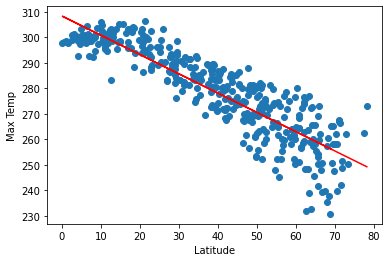

In [17]:
y_values = Northern_hemisphere["lat"]*slope + intercept
plt.scatter(Northern_hemisphere["lat"],Northern_hemisphere["temperature"])
plt.plot(Northern_hemisphere["lat"],y_values,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')


plt.savefig('linearregression-Northern Hem')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [18]:
linear_reg =st.linregress(Southern_hemisphere['lat'],Southern_hemisphere['temperature'])
linear_reg

slope = 0.2645375845047388

intercept = 301.98336853453657

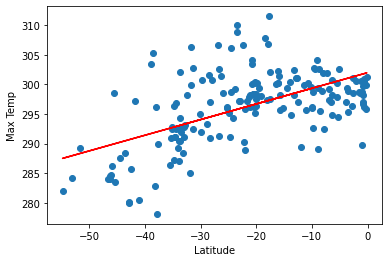

In [19]:
y_values = Southern_hemisphere["lat"]*slope + intercept
plt.scatter(Southern_hemisphere["lat"],Southern_hemisphere["temperature"])
plt.plot(Southern_hemisphere["lat"],y_values,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')


plt.savefig('linearregression-Northern Hem')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [20]:
linear_reg =st.linregress(Northern_hemisphere['lat'],Northern_hemisphere['humidity'])
linear_reg

slope = 0.49498327429050537

intercept = 52.42911171534381

r_value = 0.43682433369

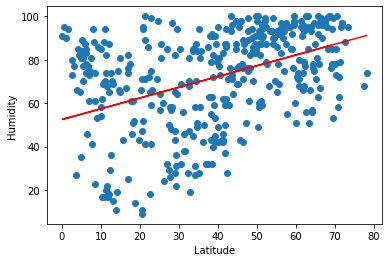

LinregressResult(slope=0.39124588519191905, intercept=56.20534270132967, rvalue=0.3574878582114349, pvalue=2.9240259687526675e-13, stderr=0.05175649169045715, intercept_stderr=2.2604709577956146)


In [21]:
y_values = Northern_hemisphere["lat"]*slope + intercept
plt.scatter(Northern_hemisphere["lat"],Northern_hemisphere["humidity"])
plt.plot(Northern_hemisphere["lat"],y_values,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')


plt.savefig('linearregression-Humidity-Northern')
plt.show()

print(linear_reg)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [22]:
linear_reg =st.linregress(Southern_hemisphere['lat'],Southern_hemisphere['humidity'])
linear_reg

slope = 0.26415698479025

intercept = 75.49921487526561

r_value = 0.17876894069375

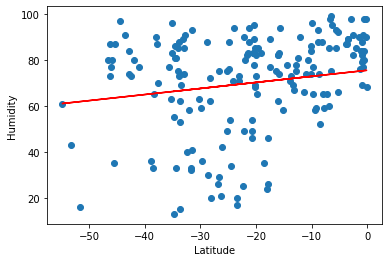

LinregressResult(slope=0.4619354363038419, intercept=80.53046198180371, rvalue=0.3009471334455758, pvalue=4.2491785044796785e-05, stderr=0.11002446614445241, intercept_stderr=2.768023644694837)


In [23]:
y_values = Southern_hemisphere["lat"]*slope + intercept
plt.scatter(Southern_hemisphere["lat"],Southern_hemisphere["humidity"])
plt.plot(Southern_hemisphere["lat"],y_values,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')


plt.savefig('linearregression-Humidity-southern')
plt.show()

print(linear_reg)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [24]:
linear_reg =st.linregress(Northern_hemisphere['lat'],Northern_hemisphere['cloudiness'])
linear_reg

slope = 0.3283513538032959

intercept = 51.0403671712149

r_value = 0.1841766888906

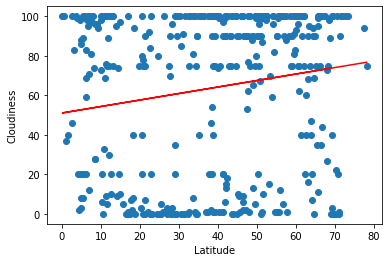

LinregressResult(slope=0.3027098642977017, intercept=49.32285739053378, rvalue=0.15058383994219787, pvalue=0.0027993981021881553, stderr=0.10063181294451193, intercept_stderr=4.3951064525753365)


In [25]:
y_values = Northern_hemisphere["lat"]*slope + intercept
plt.scatter(Northern_hemisphere["lat"],Northern_hemisphere["cloudiness"])
plt.plot(Northern_hemisphere["lat"],y_values,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')


plt.savefig('linearregression-Humidity-Northern')
plt.show()

print(linear_reg)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [26]:
linear_reg =st.linregress(Southern_hemisphere['lat'],Southern_hemisphere['cloudiness'])
linear_reg

slope = 0.7702041711990713

intercept = 78.26504201231054

r_value = 0.304164226424

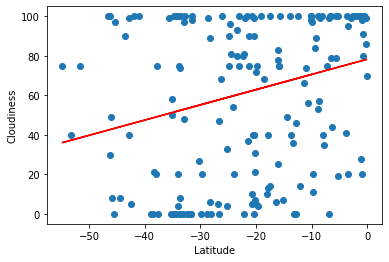

LinregressResult(slope=0.753619877593803, intercept=74.07436378197139, rvalue=0.263005786311076, pvalue=0.0003751784937498461, stderr=0.2077950116254299, intercept_stderr=5.227760020881774)


In [27]:
y_values = Southern_hemisphere["lat"]*slope + intercept
plt.scatter(Southern_hemisphere["lat"],Southern_hemisphere["cloudiness"])
plt.plot(Southern_hemisphere["lat"],y_values,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')


plt.savefig('linearregression-Humidity-southern')
plt.show()

print(linear_reg)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [28]:
linear_reg =st.linregress(Northern_hemisphere['lat'],Northern_hemisphere['wind_speed'])
linear_reg

slope = 0.015661630044158978

intercept = 2.8741540972402575

r_value = 0.112467116

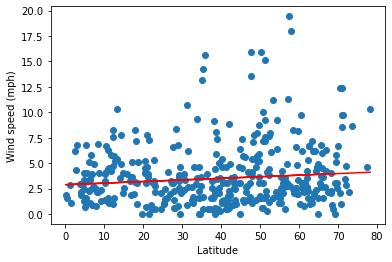

LinregressResult(slope=0.02069474315848349, intercept=2.9828137876946297, rvalue=0.13608838094563475, pvalue=0.006967946380413721, stderr=0.0076286450208731225, intercept_stderr=0.3331819826612266)


In [29]:
y_values = Northern_hemisphere["lat"]*slope + intercept
plt.scatter(Northern_hemisphere["lat"],Northern_hemisphere["wind_speed"])
plt.plot(Northern_hemisphere["lat"],y_values,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind speed (mph)')


plt.savefig('linearregression-Humidity-Northern')
plt.show()

print(linear_reg)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [30]:
linear_reg =st.linregress(Southern_hemisphere['lat'],Southern_hemisphere['wind_speed'])
linear_reg

slope = -0.06482237505915787

intercept = 2.593128920886951

r_value = -0.340503049

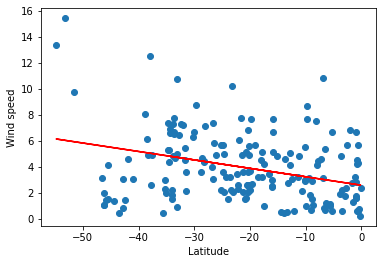

LinregressResult(slope=-0.05304831771351683, intercept=2.8662658621442896, rvalue=-0.27205070096755724, pvalue=0.00022958302672845848, stderr=0.014103857469449867, intercept_stderr=0.3548284515699199)


In [31]:
y_values = Southern_hemisphere["lat"]*slope + intercept
plt.scatter(Southern_hemisphere["lat"],Southern_hemisphere["wind_speed"])
plt.plot(Southern_hemisphere["lat"],y_values,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind speed')


plt.savefig('linearregression-Humidity-southern')
plt.show()

print(linear_reg)